To explain the process of NLP, I will take you through the sentiment classification task using Python. The steps to solve this NLP problem are:

1. Finding a dataset for sentiment classification
2. Preparing the dataset by tokenization, stopwords removal, and stemming
3. Text vectorization
4. Training a classification model for sentiment classification

# **Step 1: Finding a Dataset**

In this problem, we need to find a dataset containing text about the sentiments of people towards a product or service.

In [1]:
import zipfile
with zipfile.ZipFile('/content/IMDB Dataset.csv.zip') as zip_file:
    file_list = zip_file.namelist()

file_list

['IMDB Dataset.csv']

In [2]:
import pandas as pd
with zipfile.ZipFile('/content/IMDB Dataset.csv.zip') as zip_file:
    df = pd.read_csv(zip_file.open('IMDB Dataset.csv'))

In [3]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


# **Step 2: Data Preparation, Tokenization, Stopwords Removal and Stemming**

Our textual dataset needs preparation before being used for any problem based on NLP. Here we will:

1. remove links and all the special characters from the review column
2. tokenize and remove the stopwords from the review column
3. stem the words in the review column

In [4]:
import nltk
import re

In [5]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["review"] = df["review"].apply(clean)

In [7]:
df['review']

0        one review mention watch  oz episod youll hook...
1        wonder littl product film techniqu unassum old...
2        thought wonder way spend time hot summer weeke...
3        basic there famili littl boy jake think there ...
4        petter mattei love time money visual stun film...
                               ...                        
49995    thought movi right good job wasnt creativ orig...
49996    bad plot bad dialogu bad act idiot direct anno...
49997    cathol taught parochi elementari school nun ta...
49998    im go disagre previous comment side maltin one...
49999    one expect star trek movi high art fan expect ...
Name: review, Length: 50000, dtype: object

### Before moving forward, let’s have a quick look at the wordcloud of the review column:

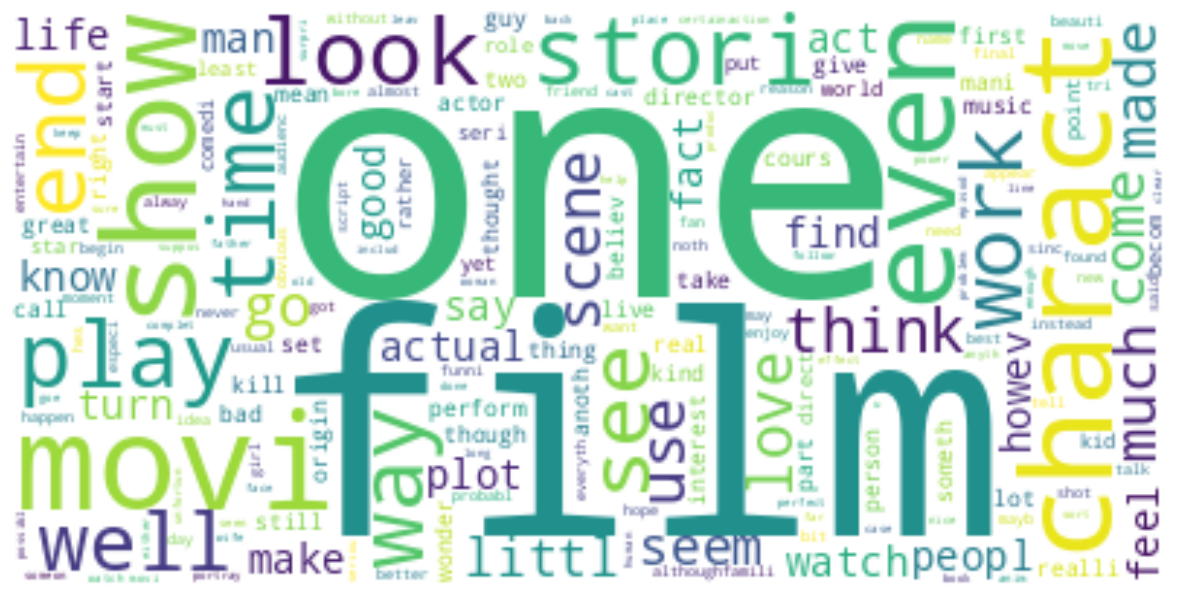

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in df.review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Step 3: Text Vectorization**

**The next step is text vectorization. It means to transform all the text tokens into numerical vectors. Here I will first perform text vectorization on the feature column (review column) and then split the data into training and test sets:**

In [9]:
import numpy as np
import pandas as pd

In [10]:
x = np.array(df["review"])
y = np.array(df["sentiment"])

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(x)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# **Step 4: Text Classification**

**The final step in the process of NLP is to classify or cluster texts. As we are working on the problem of sentiment classification, we will now train a text classification model.**

In [21]:
from sklearn.linear_model import PassiveAggressiveClassifier
model = PassiveAggressiveClassifier()
model.fit(X_train,y_train)
print(model.score(X_test, y_test))

0.8673


The dataset we used to train a sentiment classification model contains movie reviews. So let’s test the model by giving a movie review as an input:

In [28]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: one of the worst movie
['negative']


#**Summary**

While working on any problem of NLP, we first need to:

1. find a textual dataset
2. then prepare the dataset by tokenization, stopwords removal, and stemming
3. then perform text vectorization
4. and then the last step is text classification or clustering